<a href="https://colab.research.google.com/github/uygararas/ie423/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **Jupyter Notebook created by Uygar Aras for IE423 Task 5**

---



In [ ]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.datasets import fashion_mnist
import tensorflow as tf
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First Image:


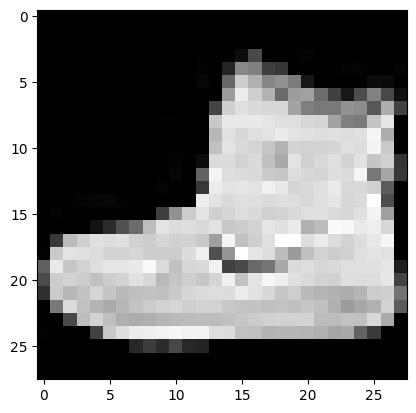

Label: 9


In [ ]:
# Cell 2: Load Data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Display first image and label
print('First Image:')
plt.imshow(X_train[0], cmap='gray')
plt.show()
print('Label:', y_train[0])

In [ ]:
# Cell 3: Data Preprocessing
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define label names
label_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [ ]:
# Cell 4: Model Building - CNN
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Cell 5: Training the CNN Model
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4498 - accuracy: 0.8382 - val_loss: 0.3497 - val_accuracy: 0.8763
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3031 - accuracy: 0.8894 - val_loss: 0.3030 - val_accuracy: 0.8900
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2562 - accuracy: 0.9054 - val_loss: 0.2786 - val_accuracy: 0.8979
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2236 - accuracy: 0.9171 - val_loss: 0.2745 - val_accuracy: 0.8990
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1973 - accuracy: 0.9264 - val_loss: 0.2561 - val_accuracy: 0.9066
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1742 - accuracy: 0.9343 - val_loss: 0.2467 - val_accuracy: 0.9110
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1521 - accuracy: 0.9422 - val_loss: 0.2855 - val_accuracy:

313/313 [==============================] - 1s 1ms/step
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.86      0.87      0.87      1000
           3       0.92      0.91      0.92      1000
           4       0.82      0.90      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.80      0.71      0.75      1000
           7       0.91      0.99      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.99      0.92      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

CNN Confusion Matrix:
 [[861   1  17  19   3   2  88   0   8   1]
 [  3 975   0  16   3   0   1   0   2   0]
 [ 14   0 874   6  59   0  46   0   1   0]
 [ 18 

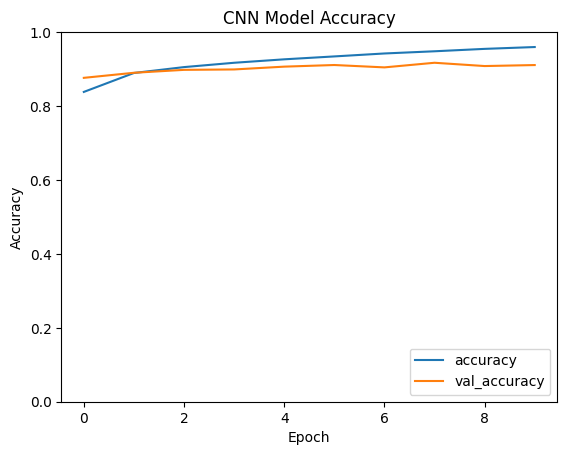

In [ ]:
# Cell 6: Evaluating the CNN Model
cnn_y_pred = cnn_model.predict(X_test)
print('CNN Classification Report:\n', classification_report(y_test.argmax(axis=1), cnn_y_pred.argmax(axis=1)))
print('CNN Confusion Matrix:\n', confusion_matrix(y_test.argmax(axis=1), cnn_y_pred.argmax(axis=1)))

# Plotting CNN training history
plt.plot(cnn_history.history['accuracy'], label='accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('CNN Model Accuracy')
plt.show()

In [ ]:
# Cell 7: Model Building - Deep Neural Network
dnn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Cell 8: Training the DNN Model
dnn_history = dnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5079 - accuracy: 0.8165 - val_loss: 0.4391 - val_accuracy: 0.8369
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3964 - accuracy: 0.8540 - val_loss: 0.4020 - val_accuracy: 0.8530
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3641 - accuracy: 0.8658 - val_loss: 0.3686 - val_accuracy: 0.8674
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3472 - accuracy: 0.8713 - val_loss: 0.3784 - val_accuracy: 0.8614
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3311 - accuracy: 0.8764 - val_loss: 0.3624 - val_accuracy: 0.8689
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3157 - accuracy: 0.8828 - val_loss: 0.3541 - val_accuracy: 0.8714
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3082 - accuracy: 0.8845 - val_loss: 0.3442 - val_accuracy:

313/313 [==============================] - 0s 1ms/step
DNN Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.96      0.98      1000
           2       0.69      0.87      0.77      1000
           3       0.89      0.91      0.90      1000
           4       0.78      0.75      0.76      1000
           5       0.98      0.96      0.97      1000
           6       0.76      0.59      0.67      1000
           7       0.92      0.97      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

DNN Confusion Matrix:
 [[851   0  24  21   2   1  96   0   5   0]
 [  4 965   5  18   4   0   2   0   2   0]
 [ 12   0 873   9  70   0  36   0   0   0]
 [ 25 

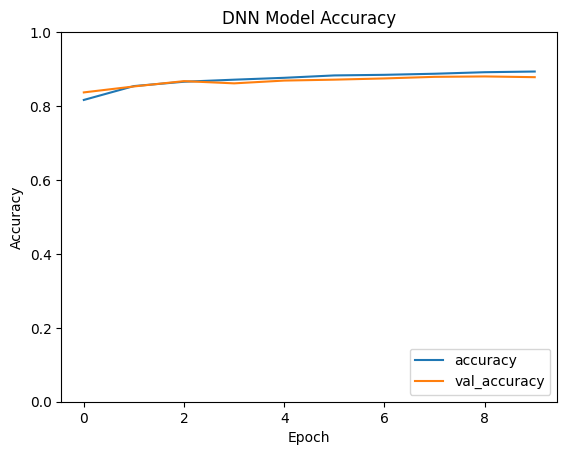

In [ ]:
# Cell 9: Evaluating the DNN Model
dnn_y_pred = dnn_model.predict(X_test)
print('DNN Classification Report:\n', classification_report(y_test.argmax(axis=1), dnn_y_pred.argmax(axis=1)))
print('DNN Confusion Matrix:\n', confusion_matrix(y_test.argmax(axis=1), dnn_y_pred.argmax(axis=1)))

# Plotting DNN training history
plt.plot(dnn_history.history['accuracy'], label='accuracy')
plt.plot(dnn_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('DNN Model Accuracy')
plt.show()

CNN Predictions:
313/313 [==============================] - 0s 1ms/step


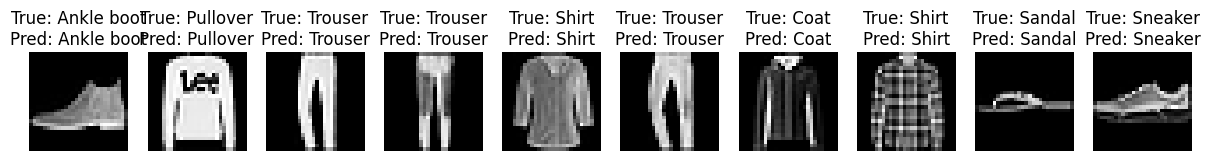

DNN Predictions:
313/313 [==============================] - 0s 1ms/step


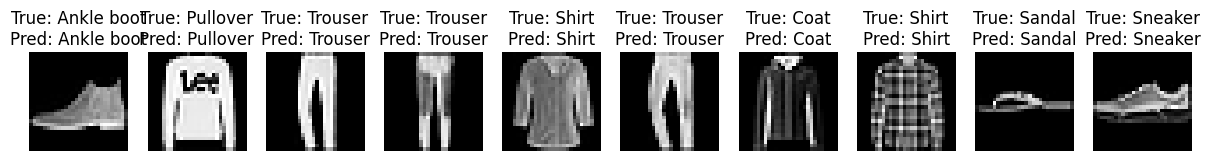

In [ ]:
# Cell 10: Display Predicted Labels
def display_predictions(model, X, y, label_names, num_images=10):
    predictions = model.predict(X)
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {label_names[y[i].argmax()]}\nPred: {label_names[predictions[i].argmax()]}")
        plt.axis('off')
    plt.show()

# Display predictions for CNN
print("CNN Predictions:")
display_predictions(cnn_model, X_test, y_test, label_names)

# Display predictions for DNN
print("DNN Predictions:")
display_predictions(dnn_model, X_test, y_test, label_names)

In [ ]:
# Cell 11: Load Test Data
test_data_path = '/content/drive/MyDrive/Colab Notebooks/data/fashion/mnist_fashion_test.csv'
test_data = pd.read_csv(test_data_path)

# Assuming the first column is the index or ID, we drop it
X_test_new = test_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test_new = test_data.iloc[:, 0].values  # Assuming the labels are in the first column

# One-hot encode the labels
y_test_new = tf.keras.utils.to_categorical(y_test_new, 10)

In [ ]:
# Cell 12: Make Predictions on New Test Data
cnn_y_pred_new = cnn_model.predict(X_test_new)
dnn_y_pred_new = dnn_model.predict(X_test_new)

313/313 [==============================] - 0s 1ms/step


In [ ]:
# Cell 13: Calculate and Display Statistics
from sklearn.metrics import accuracy_score, classification_report

# CNN Model Statistics
cnn_accuracy = accuracy_score(y_test_new.argmax(axis=1), cnn_y_pred_new.argmax(axis=1))
print(f'CNN Model Accuracy: {cnn_accuracy * 100:.2f}%')
print('CNN Classification Report:\n', classification_report(y_test_new.argmax(axis=1), cnn_y_pred_new.argmax(axis=1)))

# DNN Model Statistics
dnn_accuracy = accuracy_score(y_test_new.argmax(axis=1), dnn_y_pred_new.argmax(axis=1))
print(f'DNN Model Accuracy: {dnn_accuracy * 100:.2f}%')
print('DNN Classification Report:\n', classification_report(y_test_new.argmax(axis=1), dnn_y_pred_new.argmax(axis=1)))

CNN Model Accuracy: 91.09%
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.86      0.87      0.87      1000
           3       0.92      0.91      0.92      1000
           4       0.82      0.90      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.80      0.71      0.75      1000
           7       0.91      0.99      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.99      0.92      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

DNN Model Accuracy: 87.81%
DNN Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.9